<div>
    <table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
      <tr> 
        <th style="background-color:white"> <img src="../media/ccal-logo-D3.png" width=225 height=225></th>
        <th style="background-color:white"> <img src="../media/logoMoores.jpg" width=175 height=175></th>
        <th style="background-color:white"> <img src="../media/GP.png" width=200 height=200></th>
        <th style="background-color:white"> <img src="../media/UCSD_School_of_Medicine_logo.png" width=175 height=175></th> 
        <th style="background-color:white"> <img src="../media/Broad.png" width=130 height=130></th> 
      </tr>
    </table>
</div>

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
# **Onco-*GPS* Methodology**
## **Chapter 8. Displaying Genomic Features in the Global Onco-*GPS* Map**

**Authors:** William Kim$^{1}$, Huwate (Kwat) Yeerna$^{2}$, Taylor Cavazos$^{2}$, Kate Medetgul-Ernar$^{2}$, Clarence Mah$^{3}$, Stephanie Ting$^{2}$, Jason Park$^{2}$, Jill P. Mesirov$^{2, 3}$ and Pablo Tamayo$^{2,3}$.

1. Eli and Edythe Broad Institute      
2. UCSD Moores Cancer Center
3. UCSD School of Medicine 

**Date:** April 17, 2017

**Article:** [*Kim et al.* Decomposing Oncogenic Transcriptional Signatures to Generate Maps of Divergent Cellular States](https://drive.google.com/file/d/0B0MQqMWLrsA4b2RUTTAzNjFmVkk/view?usp=sharing)

**Analysis overview:**  In this chapter we will use the global Onco-GPS to visualize the association of selected pathway, protein and gene expression vis a vis the S1-S15 oncogenic states.

<div>
    <img src="../media/method_chap8.png" width=2144 height=1041>
</div>

Back to the [introduction chapter (0)](0 Introduction and Overview.ipynb).

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [2]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

### 2. Read the feature datasets

In [3]:
mutation_df = ccal.read_gct('../data/ccle_mut_cna.gct')
gene_dependency_df = ccal.read_gct('../data/ccle_gene_dependency.gct')
gene_expression_df = ccal.read_gct('../data/ccle_gene_expression.gct')
pathway_expression_df = ccal.read_gct(
    '../data/ccle_pathway_expression_all.gct')
regulator_df = ccal.read_gct('../data/ccle_regulator.gct')
protein_expression_df = ccal.read_gct('../data/ccle_protein_expression.gct')
tissue_df = ccal.read_gct('../data/ccle_tissue.gct')
drug_sensitivity_df = ccal.read_gct('../data/ccle_drug_sensitivity.gct')


### 3. Read oncogenic components and global clustering labels

#### 3.1 Read H matrix with all the KRAS components

In [11]:
h_matrix = ccal.read_gct('../results/nmf_cc/nmf/nmf_k9_h.gct')

#### 3.2 Read the global clustering labels 

In [12]:
global_clusterings = ccal.read_gct(
    '../results/global/clusterings/clusterings.gct')

#### 3.3 Select state labels for the k=15 oncogenic states

In [13]:
global_sample_labels = global_clusterings.ix[15, :]

### 4. Display global Onco-GPS map

#### 4.1 Define names for the components and colors for the states

In [14]:
component_names = [
    'C1 ERBB3/PI3K', 'C3 RAS/WNT/PI3K', 'C9 KRAS/AP1', 'C8 MYC',
    'C6 BRAF/MAPK', 'C7 TNF/NFkB', 'C5 HNF1/PAX8', 'C2 MYC/E2F', 'C4 EMT'
]

colors = [
    '#993300',  # Brown
    '#FFD700',  # Gold
    '#E74C3C',  # Red
    '#8B008B',  # Dark magenta  
    '#B0E0E6',  # Powder blue
    '#4169E1',  # Royal blue
    '#DC143C',  # Crimson  
    '#669999',  # Green
    '#F4BD60',  # Light Sandy brown
    '#2E8B57',  # Sea green
    '#4b0082',  # indigo #000080',  # Naby blue 
    '#D2691E',  # Chocolate
    '#FA8072',  # Salmon
    '#DA70D6',  # Orchid  
    '#90EE90'
]  # Light green

#### 4.2 Display global Onco-GPS map

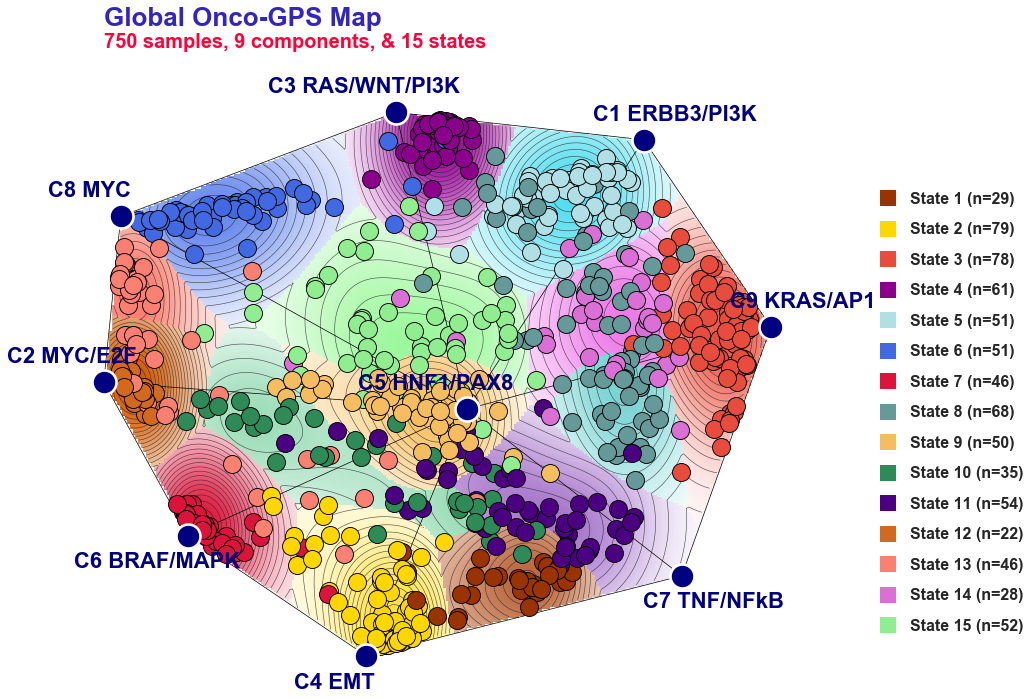

In [19]:
ccal.oncogps.make_oncogps(
    h_matrix,
    global_sample_labels,
    title='Global Onco-GPS Map',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    kde_bandwidth_factor=1.25,
    informational_mds=False,
    state_colors=colors,
    component_names=component_names)
#filepath = DIR_RESULT + '/Global_Onco-GPS.pdf')

### 5 Display selected genomic features in the global Onco-GPS map

#### 5.1 Display the enrichment scores for selected gene sets/pathways

Two "master" axes of the global Onco-GPS are EMT and NF-kB which we will display below

Onco-GPS for ZEB1 targets (red indicates higher relative expression and blue lower relative expression)

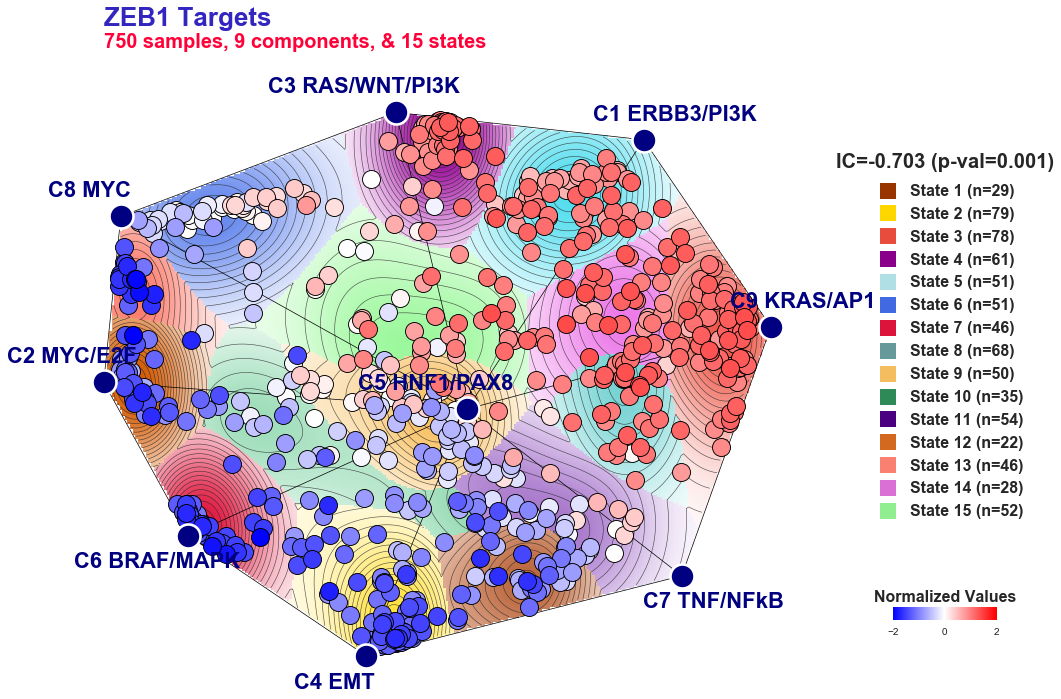

In [16]:
ccal.oncogps.make_oncogps(
    h_matrix,
    global_sample_labels,
    training_annotation=pathway_expression_df.ix['AIGNER_ZEB1_TARGETS', :],
    title='ZEB1 Targets',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    kde_bandwidth_factor=1.25,
    informational_mds=False,
    state_colors=colors,
    component_names=
    component_names)  #filepath='/Users/tamayo/Desktop/blah2.pdf')

Box plot for ZEB1 Targets (higher values indicate higher relative expression)

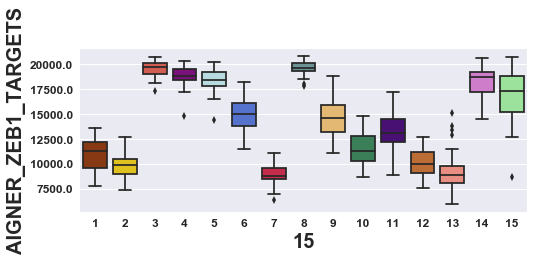

In [17]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=pathway_expression_df.ix['AIGNER_ZEB1_TARGETS',
                               global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

Onco-GPS for NFkB activation (red indicates higher relative expression and blue lower relative expression)

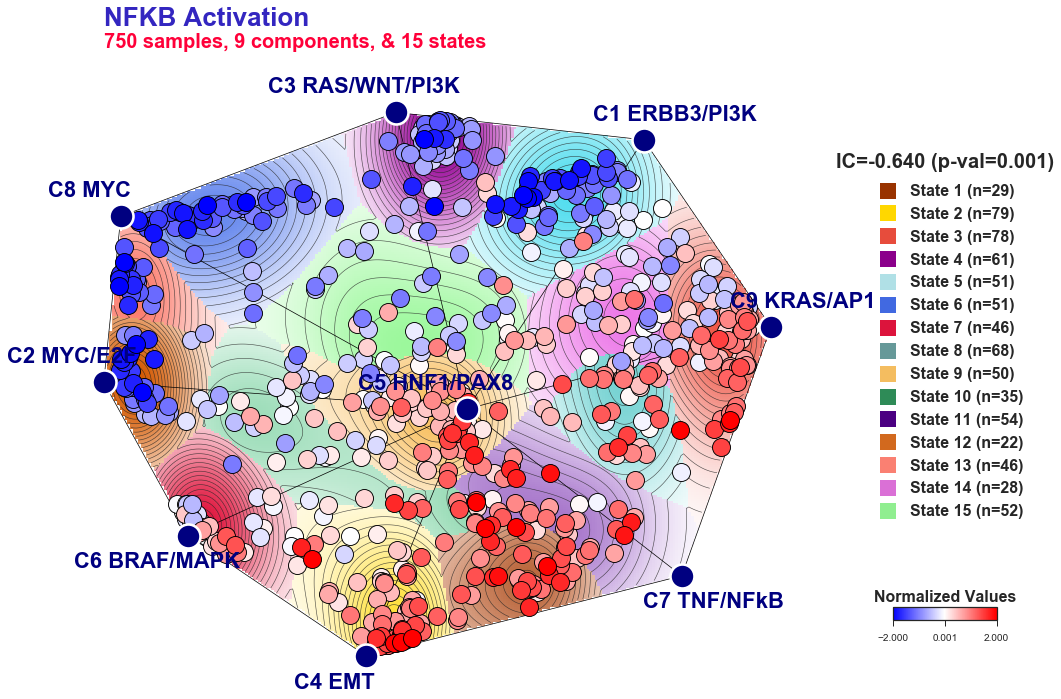

In [18]:
ccal.oncogps.make_oncogps(
    h_matrix,
    global_sample_labels,
    training_annotation=pathway_expression_df.ix[
        'HINATA_NFKB_TARGETS_FIBROBLAST_UP', :],
    title='NFKB Activation',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    kde_bandwidth_factor=1.25,
    informational_mds=False,
    state_colors=colors,
    component_names=component_names)
#filepath='/Users/tamayo/Desktop/blah2.pdf')

Box plot for NFkB activation (higher values indicate higher relative expression)

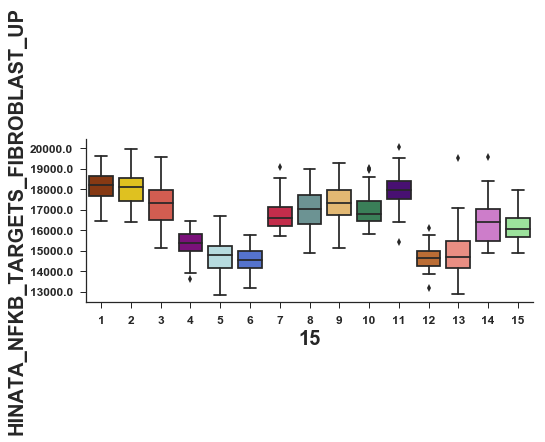

In [19]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=pathway_expression_df.ix['HINATA_NFKB_TARGETS_FIBROBLAST_UP',
                               global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

#### 5.2 Display different tissue types

Onco-GPS for Lung Cancers  (black indicates the sample is a Lung Cancer, gray a different tissue type)

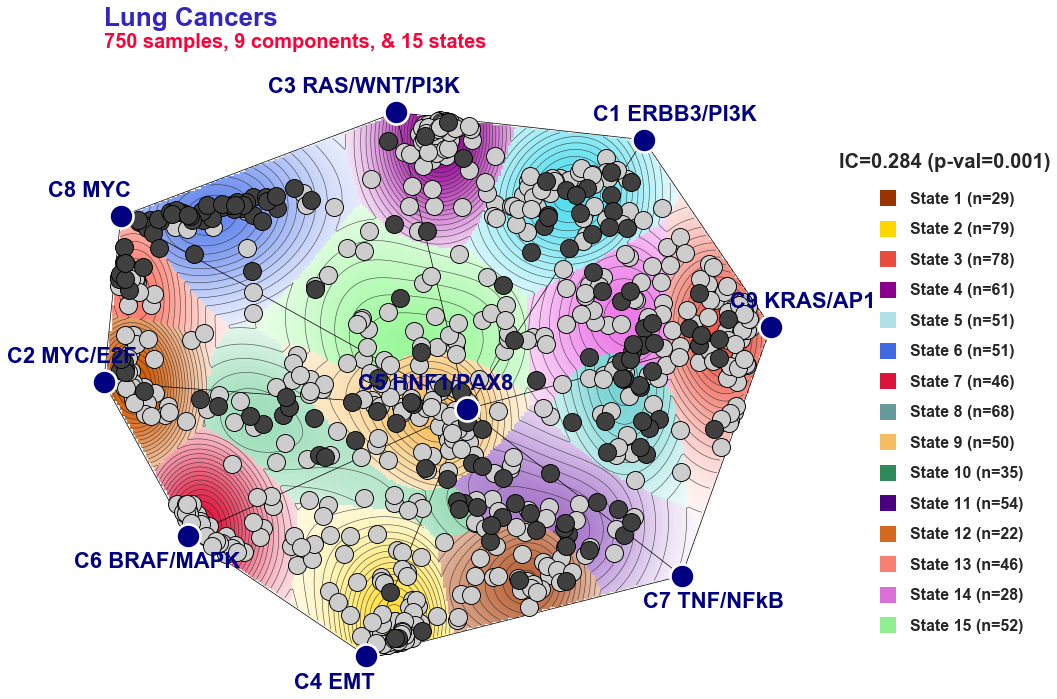

In [20]:
ccal.oncogps.make_oncogps(
    h_matrix,
    global_sample_labels,
    annotation_type='binary',
    training_annotation=tissue_df.ix['lung', :],
    title='Lung Cancers',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = '/Users/tamayo/Desktop/Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for Lung Cancers  (the bars indicate frequency of Lung Cancers in each state)

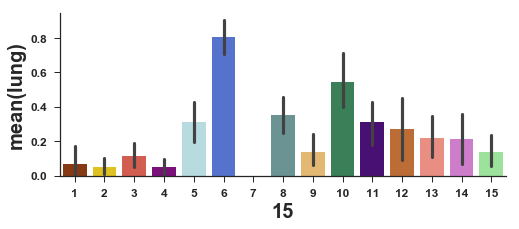

In [21]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=tissue_df.ix['lung', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

Onco-GPS for Ovarian Cancers  (black indicates the sample is a Ovarian Cancer, gray a different tissue type)

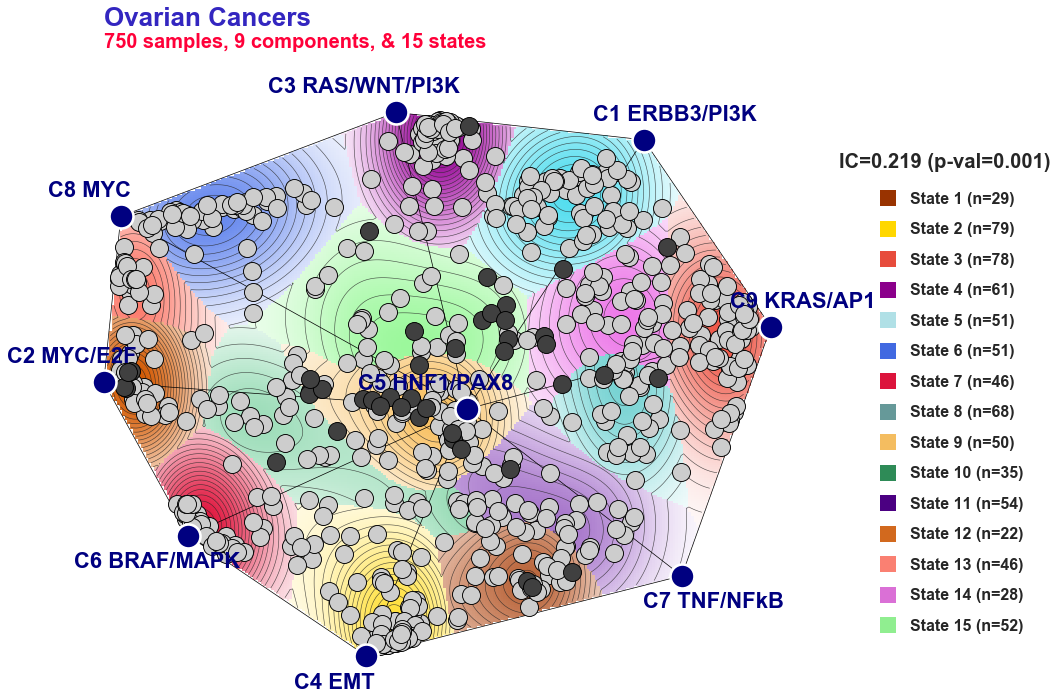

In [22]:
ccal.oncogps.make_oncogps(
    h_matrix,
    global_sample_labels,
    annotation_type='binary',
    training_annotation=tissue_df.ix['ovary', :],
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = '/Users/tamayo/Desktop/Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Box plots for Ovarian Cancers  (the bars indicate frequency of Ovarians Cancers in each state)

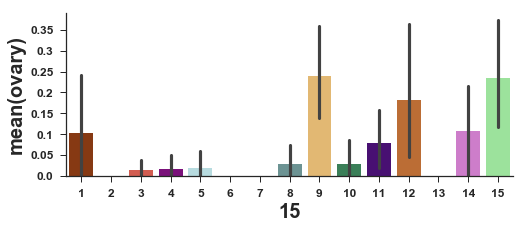

In [23]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=tissue_df.ix['ovary', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

#### 5.3 Display selected gene expression profiles 

Onco-GPS for ERBB3 Expression (red indicates higher relative expression and blue lower relative expression)

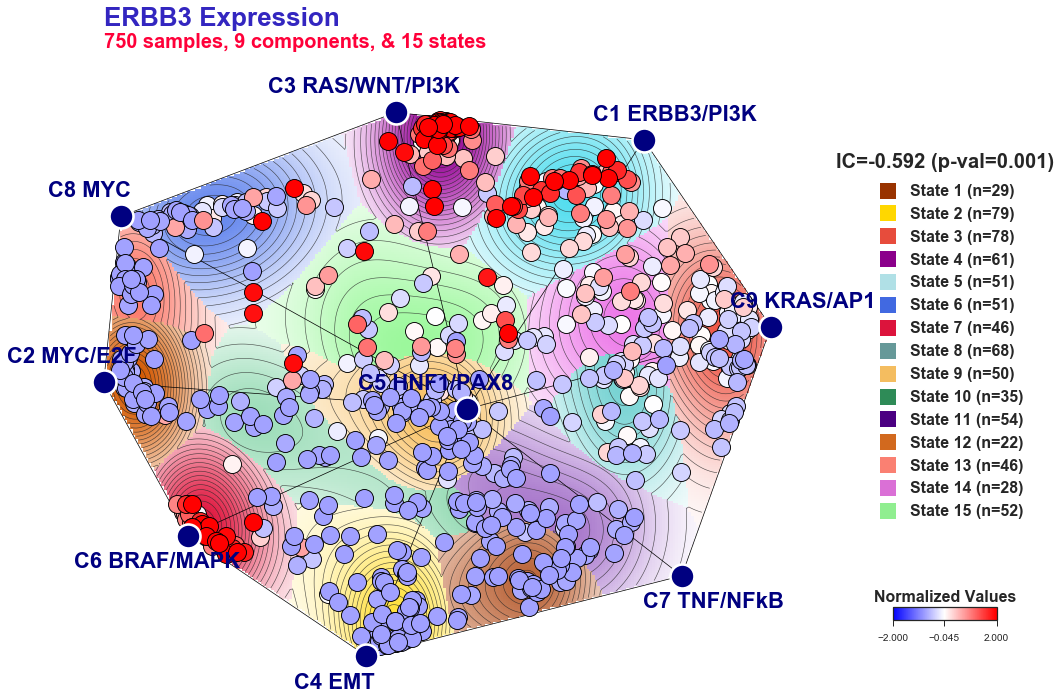

In [24]:
ccal.oncogps.make_oncogps(
    h_matrix,
    global_sample_labels,
    training_annotation=gene_expression_df.ix['ERBB3', :],
    title='ERBB3 Expression',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = '/Users/tamayo/Desktop/Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Box plot for ERBB3 Targets (higher values indicate higher relative expression)

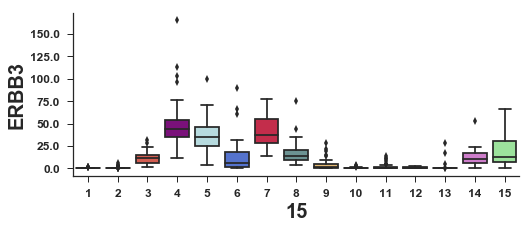

In [25]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=gene_expression_df.ix['ERBB3', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

Onco-GPS for AXL Expression (red indicates higher relative expression and blue lower relative expression)

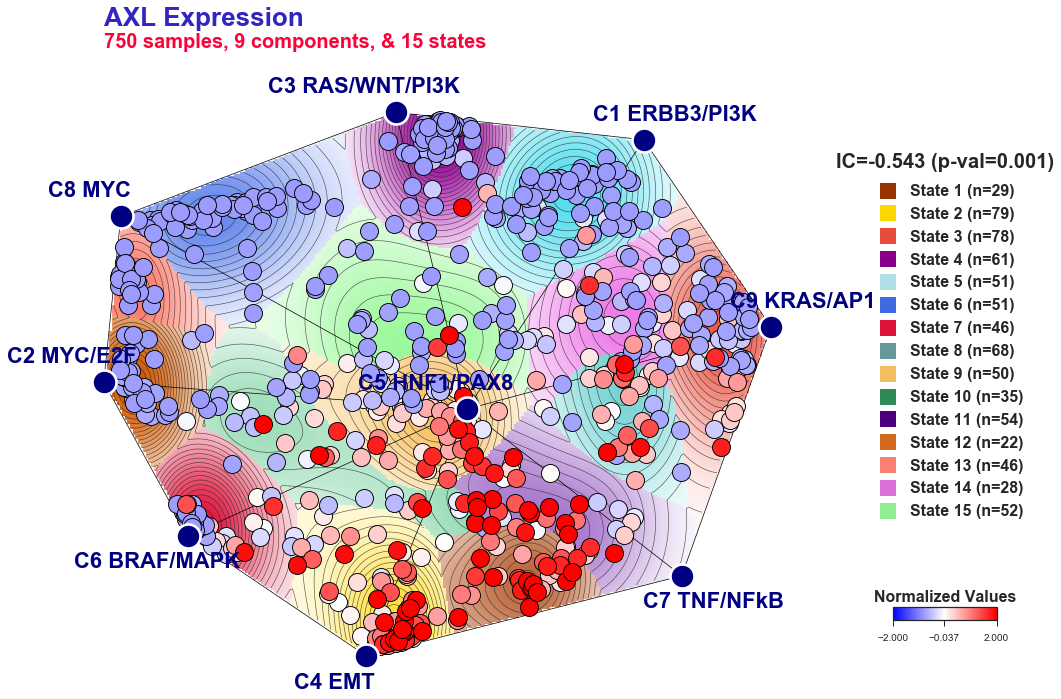

In [26]:
ccal.oncogps.make_oncogps(
    h_matrix,
    global_sample_labels,
    training_annotation=gene_expression_df.ix['AXL', :],
    title='AXL Expression',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = '/Users/tamayo/Desktop/Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Box plot for AXL Expression (higher values indicate higher relative expression)

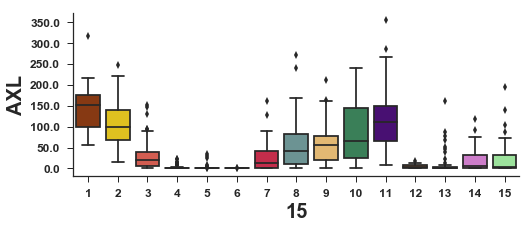

In [27]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=gene_expression_df.ix['AXL', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

#### 5.4 Display selected protein expression profiles 

Onco-GPS for E-Cadherin (red indicates higher relative protein expression and blue lower relative protein expression)

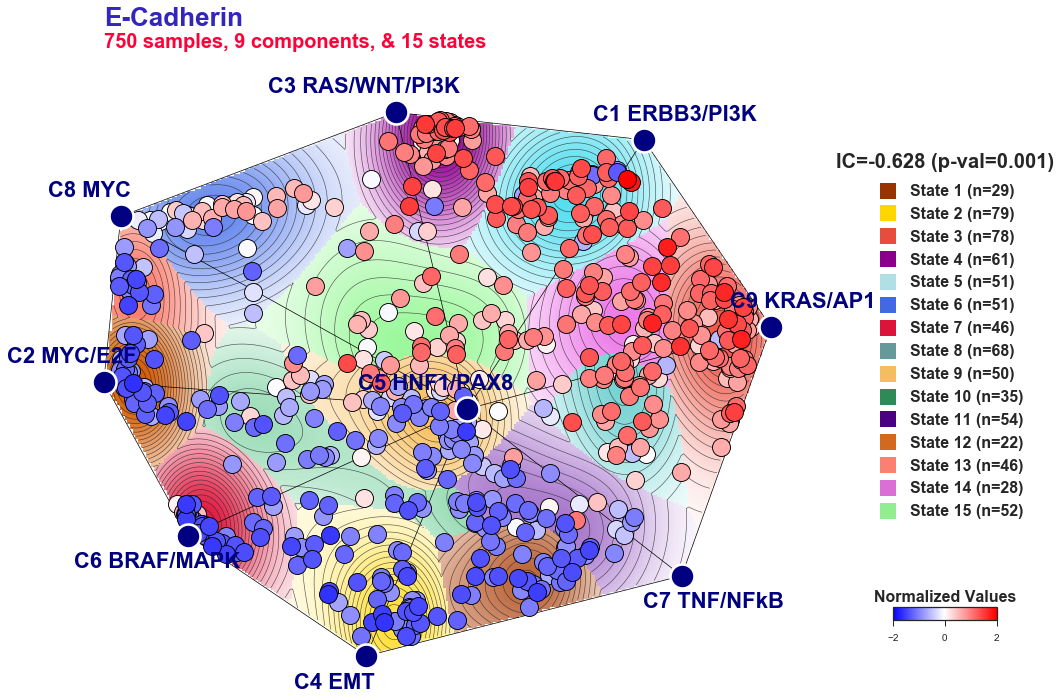

In [28]:
ccal.oncogps.make_oncogps(
    h_matrix,
    global_sample_labels,
    training_annotation=protein_expression_df.ix['E-Cadherin-R-V', :],
    title='E-Cadherin',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = '/Users/tamayo/Desktop/Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for E-Cadherin (higher values indicate higher relative protein expression)

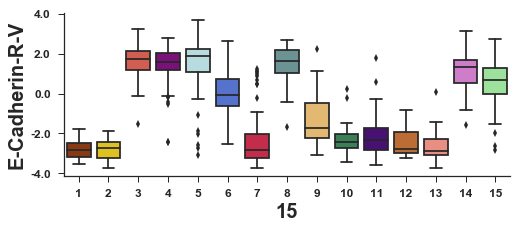

In [29]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=protein_expression_df.ix['E-Cadherin-R-V', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

Onco-GPS for HER3 (red indicates higher relative protein expression and blue lower relative protein expression)

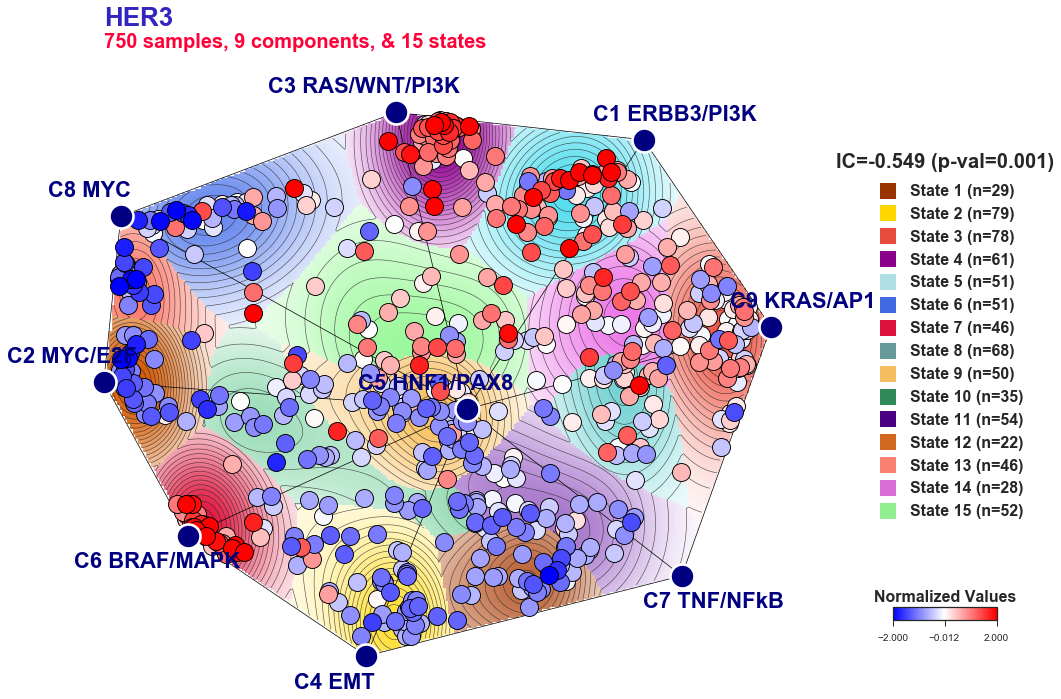

In [30]:
ccal.oncogps.make_oncogps(
    training_h=h_matrix,
    training_states=global_sample_labels,
    training_annotation=protein_expression_df.ix['HER3-R-V', :],
    title='HER3',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = DIR_RESULT + 'Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for HER3 (higher values indicate higher relative expression)

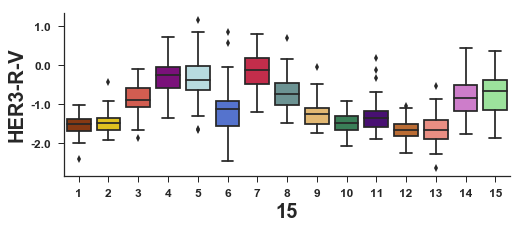

In [31]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=protein_expression_df.ix['HER3-R-V', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

#### 5.5 Display seleted mutations

Onco-GPS for KRAS mutations (black indicates the sample is KRAS mutant, gray wild type)

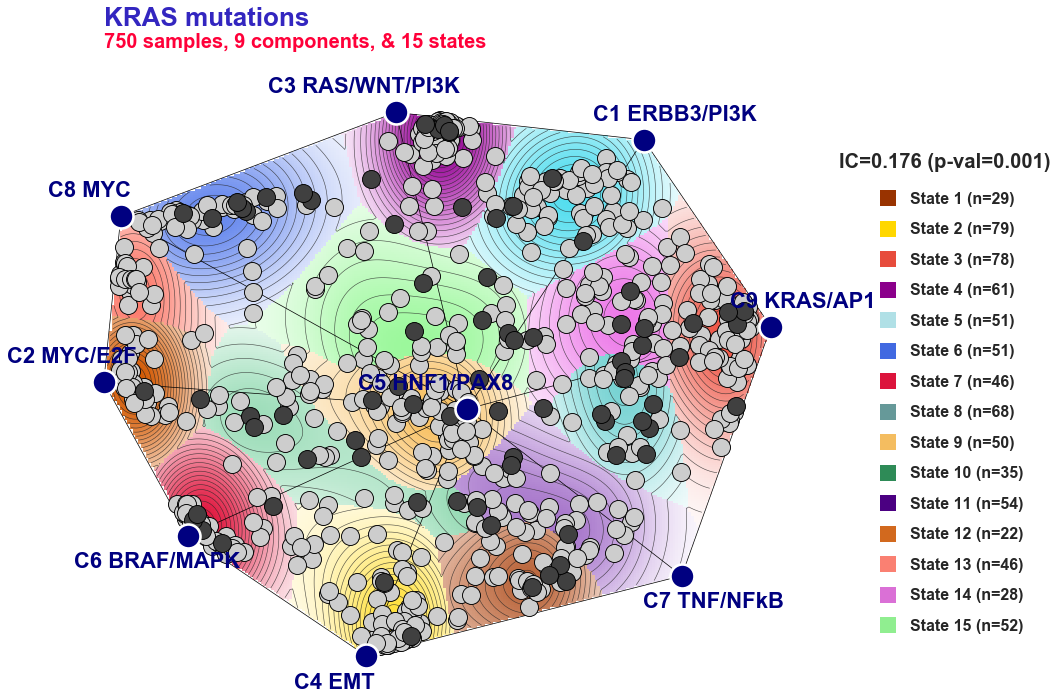

In [32]:
ccal.oncogps.make_oncogps(
    training_h=h_matrix,
    training_states=global_sample_labels,
    annotation_type='binary',
    training_annotation=mutation_df.ix['KRAS_AMP', :],
    title='KRAS mutations',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = '/Users/tamayo/Desktop/Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for KRAS mutations (the bars show frequency of KRAS mutations in each state)

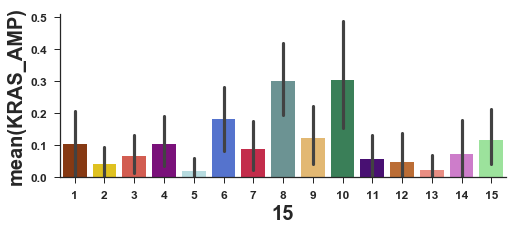

In [33]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=mutation_df.ix['KRAS_AMP', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

Onco-GPS for EGFR mutations (black indicates the sample is EGFR mutant, gray wild type)

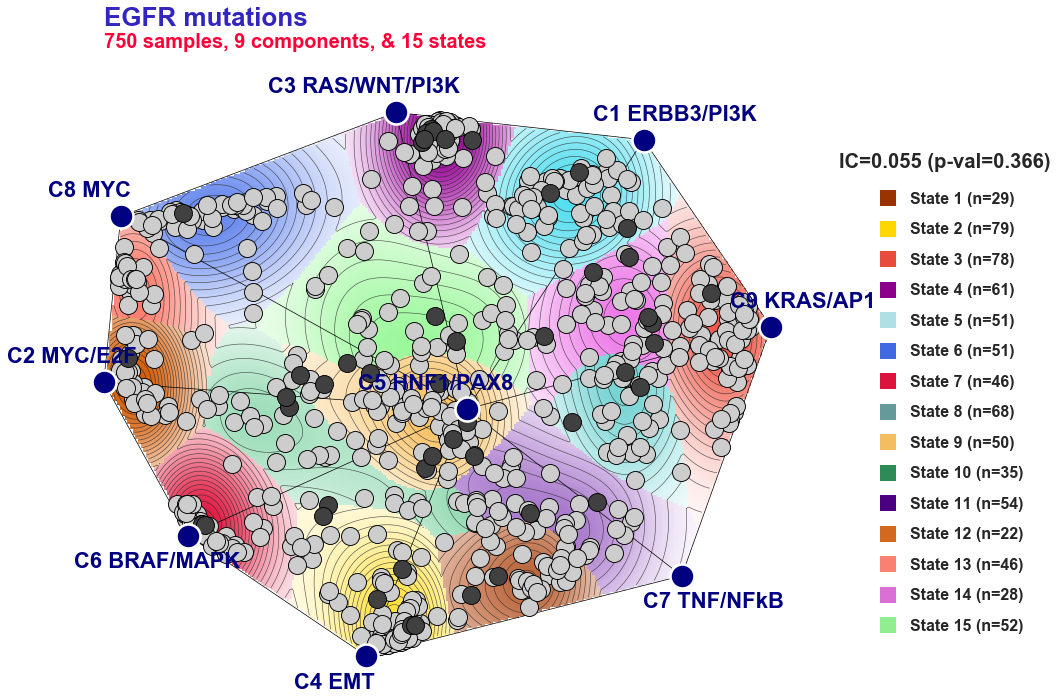

In [34]:
ccal.oncogps.make_oncogps(
    training_h=h_matrix,
    training_states=global_sample_labels,
    annotation_type='binary',
    training_annotation=mutation_df.ix['EGFR_MUT', :],
    title='EGFR mutations',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = '/Users/tamayo/Desktop/Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for EGFR mutations  (the bars show frequency of EGFR mutations in each state)

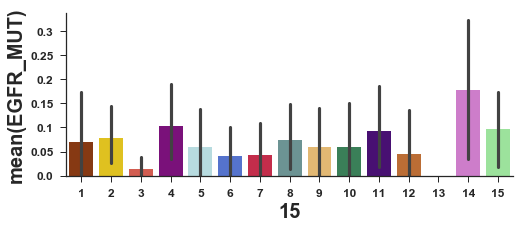

In [35]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=mutation_df.ix['EGFR_MUT', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))


#### 5.6 Display selected synthetic lethalities 

Onco-GPS for SOX10 dependency (blue indicates lower relative cell viability and red higher relative cell viability)

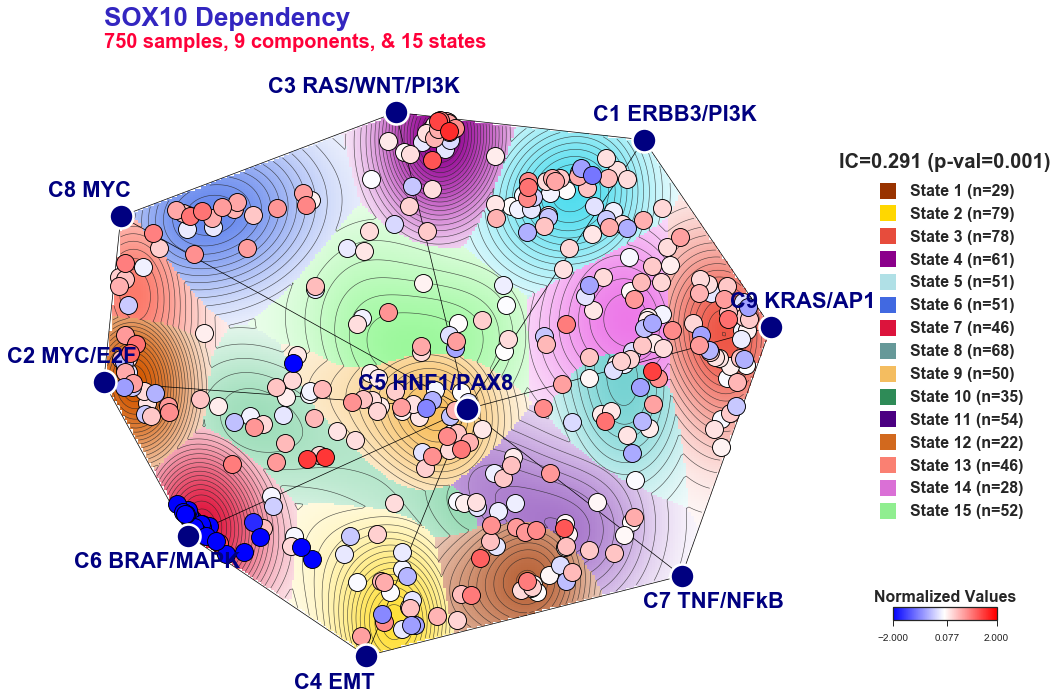

In [36]:
ccal.oncogps.make_oncogps(
    training_h=h_matrix,
    training_states=global_sample_labels,
    training_annotation=gene_dependency_df.ix['SOX10', :],
    title='SOX10 Dependency',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = DIR_RESULT + 'Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for SOX10 dependency (lower values indicate lower relative cell viability)

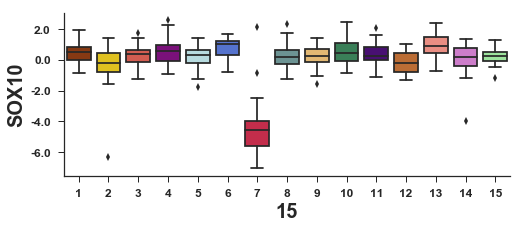

In [37]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=gene_dependency_df.ix['SOX10', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

Onco-GPS for CTNNB1 Dependency (blue indicates lower relative cell viability and red higher relative cell viability)

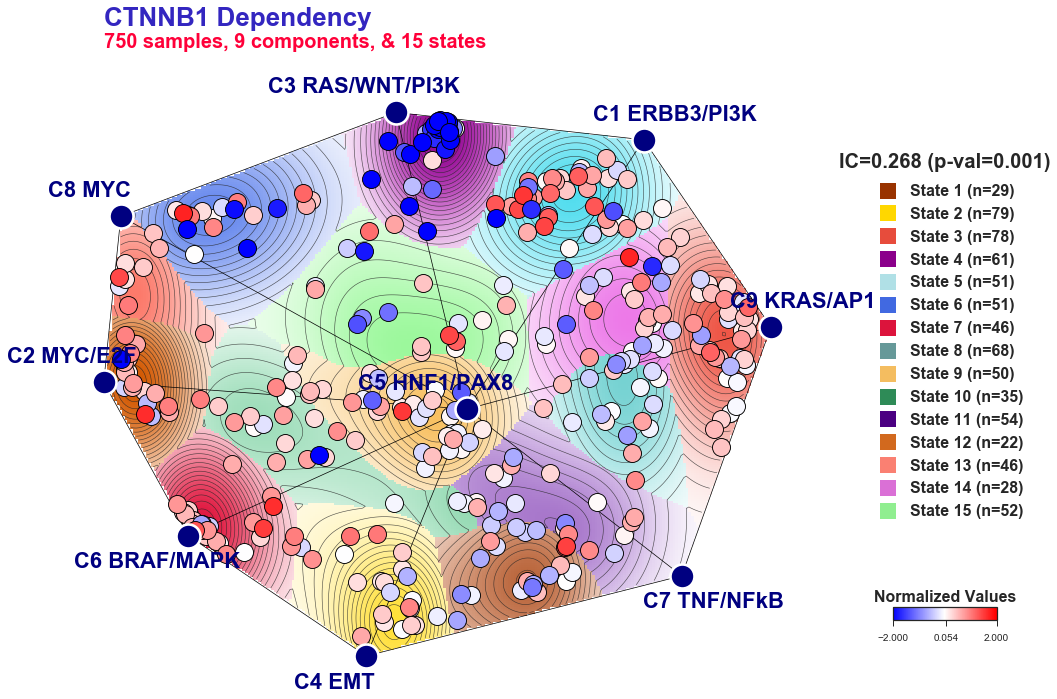

In [38]:
ccal.oncogps.make_oncogps(
    training_h=h_matrix,
    training_states=global_sample_labels,
    training_annotation=gene_dependency_df.ix['CTNNB1', :],
    title='CTNNB1 Dependency',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = DIR_RESULT + 'Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for CTNNB1 Dependency (lower values indicate lower relative cell viability)

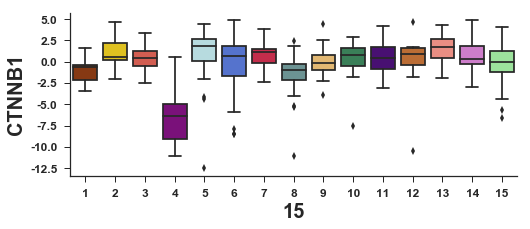

In [39]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=gene_dependency_df.ix['CTNNB1', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))

#### 5.7 Display sensitivity to selected drugs 

Onco-GPS for BRAF Inhibitor PLX-4720  (blue indicates higher relative sensitivity and red higher relative resistance)

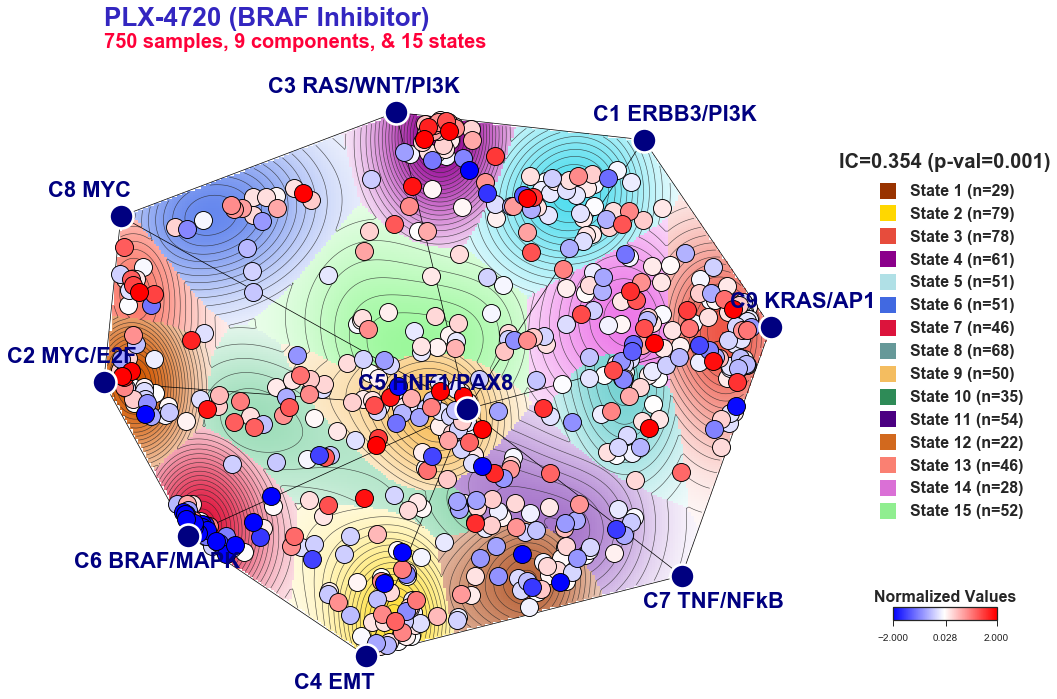

In [40]:
ccal.oncogps.make_oncogps(
    training_h=h_matrix,
    training_states=global_sample_labels,
    training_annotation=drug_sensitivity_df.ix['PLX-4720', :],
    title='PLX-4720 (BRAF Inhibitor)',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    informational_mds=False,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    component_names=component_names)
#filepath = DIR_RESULT + 'Global_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for BRAF Inhibitor PLX-4720  (lower values imply higher sensitivity)

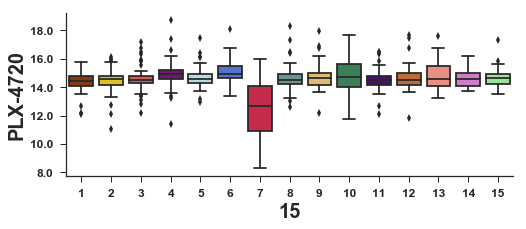

In [42]:
ccal.plot_violin_box_or_bar(
    x=global_sample_labels,
    y=drug_sensitivity_df.ix['PLX-4720', global_sample_labels.index],
    colors=colors,
    violin_or_box='box',
    figure_size=(8, 3))